<a href="https://colab.research.google.com/github/emmad225/DataScienceCoursework/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QUESTION 1a: Simulate 500 samples from a Binomial random variable with parameters N = 100 and p = .1. Create a histogram of the 500 samples.


Text(0.5, 1.0, 'Binomial Distribution')

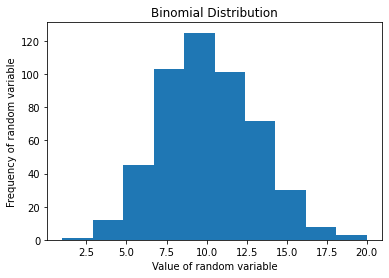

In [ ]:
import matplotlib.pyplot as plt
import scipy as sp
import math
import numpy as np

N = 100
p = 0.1
samples = 500

binom = np.random.binomial(N, p, samples)
plt.hist(binom)

plt.xlabel("Value of random variable")
plt.ylabel("Frequency of random variable")
plt.title("Binomial Distribution")

RESULTS: This graph shows the binomial distribution of 500 samples with probability 0.1 and N = 100 being the estimated of contacts per day that someone has. The value of the random variable calculated through the binomial equation ranges between a little less than 2.5 and a little over 20.0 along the x-axis. The most popular random variable being roughly around 10.0. I am able to conclude this because the y-axis denotes the frequency of each value. The taller the historgram bar, the more frequent the correlated number on the x-axis occurs.

QUESTION 1b: Next 500 samples from a Poisson random variable with parameter λ = 10. What is the sample mean and variance? Create a histogram of the 500 samples and compare to the histogram in 1a.


Sample Mean: 9.852
Variance: 9.450096000000002


Text(0.5, 1.0, 'Poisson Distribution')

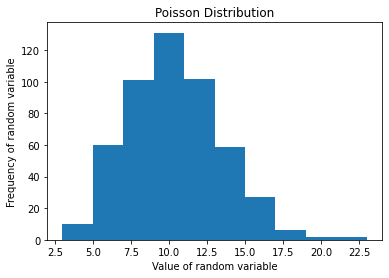

In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np
x = 10
samples = 500

poisson = np.random.poisson(x, samples)

print("Sample Mean:", np.mean(poisson))
print("Variance:", np.var(poisson))

plt.hist(poisson)

plt.xlabel("Value of random variable")
plt.ylabel("Frequency of random variable")
plt.title("Poisson Distribution")

RESULTS: This histogram shows the results of a poisson distribution with 500 samples and a lambda value of 10. The value of the random varibles is seen along the x-axis and the frequency of each of these values is shown according to the y-axis. As seen in this graph, the most frequent random varible occurs around 10, for a frequency of approximately 120. The sample mean and variance are also printed above; both estmimated to be around 9 and 10. This graph very closely resemebles the graph of the binomial graoh above, showing how they are very closely related. These graphs however are not entirely accurate because our contacts in given circumstances are not completely random.

QUESTION 2a: Implement code for the branching process in Algorithm 1 with N[0] = 1 and R[0] = .95. Simulate the process 1000 times and make a plot of N(g) vs g for the 1000 simulations. What is the average epidemic size (total infections) across the 1000 simulations?


Average epidemic size:  19.715841584158415
Sample variable 2.429059252132144


Text(0, 0.5, 'Total Infected in Population')

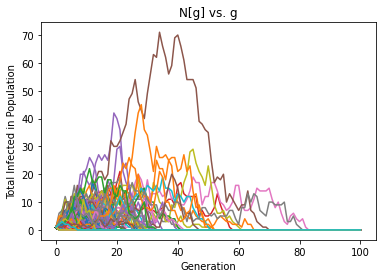

In [ ]:
import numpy as np

x = [101, 1000]
N = np.zeros(x)
N[0] = 1
G = 1000
R = 0.95

for i in range(0, 1000):
  for g in range(101):
    if N[g][i] == 0:
      break
    else:
      N[g+1][i] = 0
      p = np.random.poisson(R, int(N[g][i]))
      N[g+1][i] = np.sum(p)

print("Average epidemic size: ", np.mean(N)*100)
plt.plot(N)
plt.title("N[g] vs. g")
print("Sample variable", np.var(N))
plt.xlabel("Generation")
plt.ylabel("Total Infected in Population")

RESULTS: In this example we simulate the branching process of Algorithm 1. The data seen is the result of 1000 simulations with N[0] = 1 meaning that there is 1 indiivudla in generation 0 to begin the branching process and the number of generations to reach 1000. A matrix is created to loop over each node and then again to analyze how many direct infections one causes in the next generation.

QUESTION 2b: Next estimate the average epidemic size for the model in 2a using the geometric series (summation from i=0 to infinity of 1/1-R(sub 0). How does your estimate compare to the average you found in 2a?

In [ ]:
print("average epidemic size =" , 1/(1-0.95))

average epidemic size = 19.999999999999982


RESULTS: The average epidemic size and the mean found above are similar, showing these two calculations are similar in nature and result to the same output of approximately 20.0.

QUESTION 3: Implement the Barabási-Albert preferential attachment network generation algorithm described in Section 2.3.2 from scratch (rather than using networkx). Then simulate a network with N = 100 nodes with 1 initial node and m = 1. Visualize the network (you can use draw spring in networkx) and also plot the degree distribution (again you can use networkx functions for this).


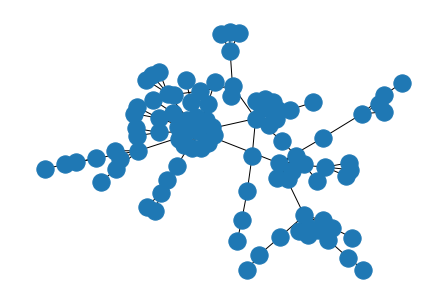

In [ ]:
from networkx.generators.random_graphs import degree_sequence_tree
import networkx as nx
import numpy as np

G= nx.Graph()
G.add_edge(1,2)

N= 100
m = 1

for m in range(3,N):
  degrees = [val for (node, val) in G.degree()]
  probs = degrees/np.sum(degrees)
  n = np.arange(1,m)
  k = np.random.choice(n,p = probs)
  G.add_edge(m,k)
nx.draw_spring(G)

Text(0, 0.5, 'Nodes')

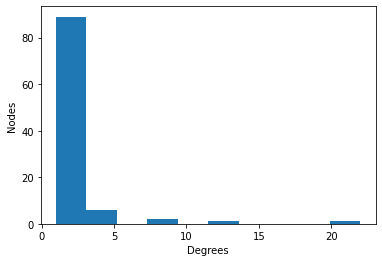

In [ ]:

degree_sequence = sorted((d for n, d, in G.degree()), reverse = True)
plt.hist(degree_sequence)
plt.xlabel("Degrees")
plt.ylabel("Nodes")

RESULTS: In this problem, we are simulating the Barabási-Albert preferential attachment network generation algorithm. The first shows the brancing process of 100 nodes starting from one initial node. From there, branching is simulated off of each of the nodes to show connections. The histogram shows the degree distribution of each node, with many having a frequency of 2.